# Analyzing Restaurants in Ahmedabad

In [0]:
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
abad_df = pd.read_csv('drive/My Drive/abad_boroughs.csv')
abad_df

,Borough,Lat,Long
0,Bodakdev,23.0387,72.5119
1,Thaltej,23.0497,72.5117
2,Vastrapur,23.0350,72.5293
3,Prahlad Nagar,23.0120,72.5108
4,Navrangpura,23.0365,72.5611
5,Paldi,23.0112,72.5631
6,Chandkheda,23.1091,72.5849
7,Bopal,23.0337,72.4634
8,Satellite,23.0301,72.5178
9,Naranpura,23.0522,72.5497


In [8]:
abad_lat = 23.0225
abad_lng = 72.5714
map_abad = folium.Map(location=[abad_lat, abad_lng], zoom_start=12)

for lat, lng, borough in zip(abad_df['Lat'], abad_df['Long'], abad_df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_abad)  
    
map_abad

In [0]:
CLIENT_ID = '****' # your Foursquare ID
CLIENT_SECRET = '*****' # your Foursquare Secret
VERSION = '20190913' # Foursquare API version
category_id = '4d4b7105d754a06374d81259'
LIMIT = 50

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius,
                category_id,
                LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

abad_venues = getNearbyVenues(names=abad_df['Borough'],
                                   latitudes=abad_df['Lat'],
                                   longitudes=abad_df['Long']
                                  )
abad_venues

Bodakdev
Thaltej
Vastrapur
Prahlad Nagar
Navrangpura
Paldi
Chandkheda
Bopal
Satellite
Naranpura


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bodakdev,23.0387,72.5119,mad by tomatos,23.040277,72.512255,Indian Restaurant
1,Bodakdev,23.0387,72.5119,Canadian Donut Co.,23.038313,72.512854,Donut Shop
2,Bodakdev,23.0387,72.5119,Atithi,23.038102,72.513375,Indian Restaurant
3,Bodakdev,23.0387,72.5119,Gordhan Thal,23.035955,72.510946,Indian Restaurant
4,Bodakdev,23.0387,72.5119,Pizza Hut,23.040032,72.513010,Pizza Place
5,Bodakdev,23.0387,72.5119,Subway,23.038234,72.512828,Sandwich Place
6,Bodakdev,23.0387,72.5119,Danny's,23.035444,72.510566,Café
7,Bodakdev,23.0387,72.5119,Mocha,23.031982,72.511358,Café
8,Bodakdev,23.0387,72.5119,Honest Pav Bhaji,23.038429,72.512459,Vegetarian / Vegan Restaurant
9,Bodakdev,23.0387,72.5119,Choice Snack Bar,23.038196,72.513026,Fast Food Restaurant


In [11]:
abad_venues = abad_venues.drop(abad_venues.index[[1, 19,20,21, 25, 215, 213, 219, 221, 223, 235, 237, 238, 241, 240, 30, 33, 34, 35, 38,39, 42,44, 46, 51, 52, 54, 57, 58, 60,61,62,63,64,65,66,68, 70, 78,79, 89, 99, 102, 111, 113, 117, 122,130,131,136, 139,143, 190,191,192,195, 209]])
abad_venues.drop_duplicates()
abad_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bodakdev,23.0387,72.5119,mad by tomatos,23.040277,72.512255,Indian Restaurant
2,Bodakdev,23.0387,72.5119,Atithi,23.038102,72.513375,Indian Restaurant
3,Bodakdev,23.0387,72.5119,Gordhan Thal,23.035955,72.510946,Indian Restaurant
4,Bodakdev,23.0387,72.5119,Pizza Hut,23.040032,72.513010,Pizza Place
5,Bodakdev,23.0387,72.5119,Subway,23.038234,72.512828,Sandwich Place
6,Bodakdev,23.0387,72.5119,Danny's,23.035444,72.510566,Café
7,Bodakdev,23.0387,72.5119,Mocha,23.031982,72.511358,Café
8,Bodakdev,23.0387,72.5119,Honest Pav Bhaji,23.038429,72.512459,Vegetarian / Vegan Restaurant
9,Bodakdev,23.0387,72.5119,Choice Snack Bar,23.038196,72.513026,Fast Food Restaurant
10,Bodakdev,23.0387,72.5119,Gormoh restaurant,23.036596,72.516340,Indian Restaurant


In [12]:
abad_venues = abad_venues.reset_index(drop=True)
abad_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bodakdev,23.0387,72.5119,mad by tomatos,23.040277,72.512255,Indian Restaurant
1,Bodakdev,23.0387,72.5119,Atithi,23.038102,72.513375,Indian Restaurant
2,Bodakdev,23.0387,72.5119,Gordhan Thal,23.035955,72.510946,Indian Restaurant
3,Bodakdev,23.0387,72.5119,Pizza Hut,23.040032,72.513010,Pizza Place
4,Bodakdev,23.0387,72.5119,Subway,23.038234,72.512828,Sandwich Place
5,Bodakdev,23.0387,72.5119,Danny's,23.035444,72.510566,Café
6,Bodakdev,23.0387,72.5119,Mocha,23.031982,72.511358,Café
7,Bodakdev,23.0387,72.5119,Honest Pav Bhaji,23.038429,72.512459,Vegetarian / Vegan Restaurant
8,Bodakdev,23.0387,72.5119,Choice Snack Bar,23.038196,72.513026,Fast Food Restaurant
9,Bodakdev,23.0387,72.5119,Gormoh restaurant,23.036596,72.516340,Indian Restaurant


In [13]:
abad_venues = abad_venues.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
abad_venues[(abad_venues.Venue == 'gwalia') & (abad_venues.Borough == 'prahlad nagar')].index[0]
abad_venues.at[87, 'Venue'] = "gwalia"
abad_venues[abad_venues['Venue'].str.contains("page")]
abad_venues.drop(abad_venues[(abad_venues.Venue == 'page one') & (abad_venues.Borough == 'satellite')].index, inplace=True)
abad_venues.shape

(191, 7)

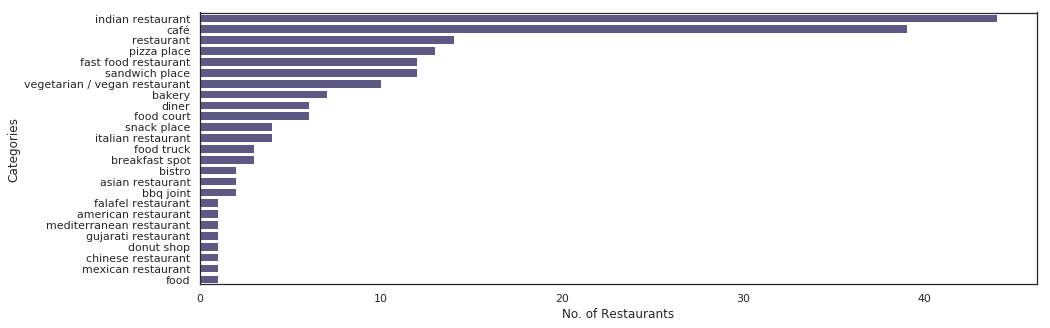

In [14]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="white")
category_plot = sns.barplot(x=abad_venues['Venue Category'].value_counts(), y=abad_venues['Venue Category'].value_counts().index, orient='h', color= '#58508d')
category_plot.set(xlabel='No. of Restaurants', ylabel='Categories')
category_plot

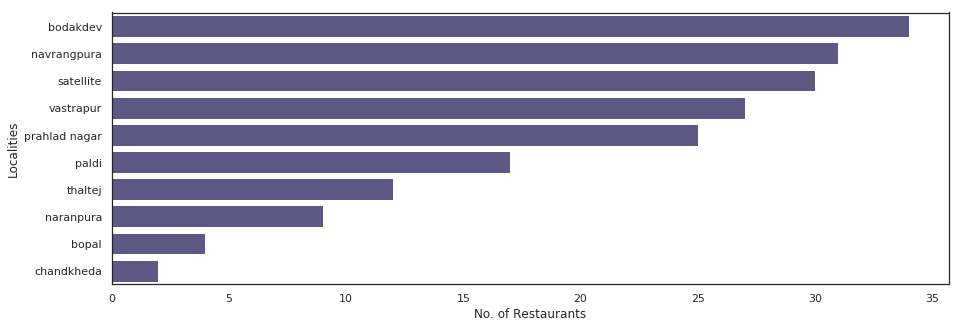

In [15]:
venue_plot = sns.barplot(x=abad_venues.Borough.value_counts(), y=abad_venues.Borough.value_counts().index, orient='h',color= '#58508d')
venue_plot.set(xlabel='No. of Restaurants', ylabel='Localities')
venue_plot

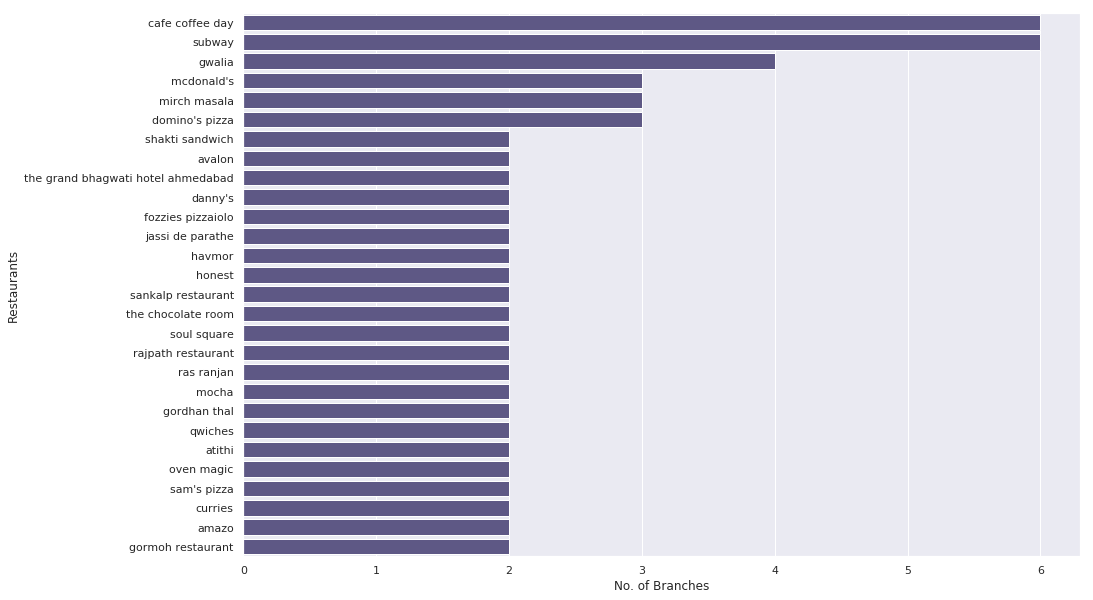

In [16]:
branch_venues = abad_venues.Venue.value_counts()
threshold = 1
mask = branch_venues > threshold
branch_venues = branch_venues.loc[mask]
sns.set(rc={'figure.figsize':(15,10)})

name_plot = sns.barplot(x=branch_venues, y=branch_venues.index, orient='h',color= '#58508d')
name_plot.set(xlabel='No. of Branches', ylabel='Restaurants')
name_plot

In [0]:
abad_cat = pd.get_dummies(abad_venues[['Venue Category']], prefix="", prefix_sep="")
abad_cat['Borough'] = abad_venues['Borough']
fixed_columns = [abad_cat.columns[-1]] + list(abad_cat.columns[:-1])
abad_cat = abad_cat[fixed_columns]

In [18]:
abad_grouped = abad_cat.groupby('Borough').mean().reset_index()
abad_grouped

,Borough,american restaurant,asian restaurant,bakery,bbq joint,bistro,breakfast spot,café,chinese restaurant,diner,donut shop,falafel restaurant,fast food restaurant,food,food court,food truck,gujarati restaurant,indian restaurant,italian restaurant,mediterranean restaurant,mexican restaurant,pizza place,restaurant,sandwich place,snack place,vegetarian / vegan restaurant
0,bodakdev,0.000000,0.000000,0.029412,0.00,0.000000,0.000000,0.264706,0.000000,0.058824,0.000000,0.000000,0.029412,0.000000,0.029412,0.000000,0.00,0.294118,0.058824,0.000000,0.00,0.088235,0.088235,0.029412,0.000000,0.029412
1,bopal,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.500000,0.000000,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000
2,chandkheda,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.00,0.000000,0.500000,0.000000,0.000000,0.000000
3,naranpura,0.000000,0.111111,0.000000,0.00,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.111111,0.222222,0.000000,0.111111
4,navrangpura,0.000000,0.000000,0.064516,0.00,0.000000,0.000000,0.193548,0.000000,0.000000,0.000000,0.032258,0.096774,0.032258,0.064516,0.032258,0.00,0.258065,0.000000,0.000000,0.00,0.096774,0.032258,0.032258,0.064516,0.000000
5,paldi,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.176471,0.000000,0.000000,0.117647,0.00,0.235294,0.000000,0.000000,0.00,0.058824,0.000000,0.117647,0.058824,0.117647
6,prahlad nagar,0.000000,0.000000,0.080000,0.08,0.000000,0.040000,0.120000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.00,0.200000,0.000000,0.000000,0.04,0.040000,0.080000,0.080000,0.000000,0.120000
7,satellite,0.033333,0.000000,0.033333,0.00,0.000000,0.000000,0.300000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.00,0.300000,0.033333,0.000000,0.00,0.033333,0.066667,0.033333,0.000000,0.066667
8,thaltej,0.000000,0.000000,0.000000,0.00,0.083333,0.083333,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.166667,0.083333,0.083333,0.00,0.000000,0.083333,0.083333,0.000000,0.000000
9,vastrapur,0.000000,0.037037,0.037037,0.00,0.000000,0.037037,0.259259,0.000000,0.000000,0.037037,0.000000,0.074074,0.000000,0.037037,0.000000,0.00,0.111111,0.000000,0.000000,0.00,0.111111,0.111111,0.074074,0.037037,0.037037


In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
abad_venues_sorted = pd.DataFrame(columns=columns)
abad_venues_sorted['Borough'] = abad_grouped['Borough']

for ind in np.arange(abad_grouped.shape[0]):
    abad_venues_sorted.iloc[ind, 1:] = return_most_common_venues(abad_grouped.iloc[ind, :], num_top_venues)

abad_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,bodakdev,indian restaurant,café,restaurant,pizza place,diner,italian restaurant,vegetarian / vegan restaurant,sandwich place,bakery,food court
1,bopal,indian restaurant,pizza place,gujarati restaurant,vegetarian / vegan restaurant,falafel restaurant,asian restaurant,bakery,bbq joint,bistro,breakfast spot
2,chandkheda,restaurant,indian restaurant,vegetarian / vegan restaurant,falafel restaurant,asian restaurant,bakery,bbq joint,bistro,breakfast spot,café
3,naranpura,sandwich place,vegetarian / vegan restaurant,restaurant,asian restaurant,bistro,café,food court,diner,falafel restaurant,bakery
4,navrangpura,indian restaurant,café,pizza place,fast food restaurant,bakery,food court,snack place,sandwich place,restaurant,food truck


In [0]:
Sum_of_squared_distances = []
abad_grp_cluster = abad_grouped.drop('Borough', 1)
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(abad_grp_cluster)
    Sum_of_squared_distances.append(km.inertia_)

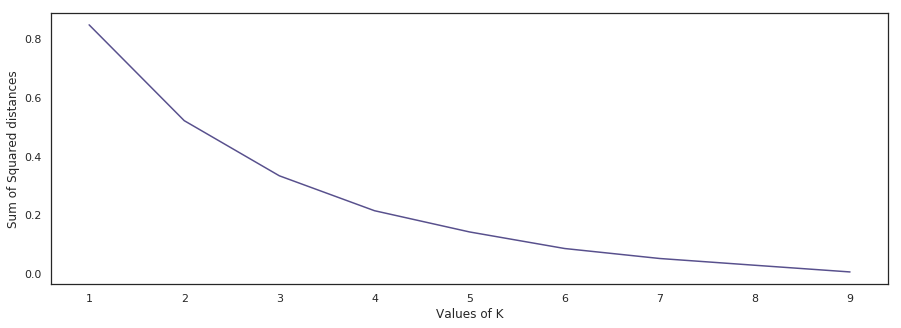

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="white")
kmeans_plot = sns.lineplot(x=K, y=Sum_of_squared_distances,color= '#58508d')
kmeans_plot.set(xlabel='Values of K', ylabel='Sum of Squared distances')
kmeans_plot

In [22]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=0).fit(abad_grp_cluster)

kmeans.labels_[0:9]

array([0, 2, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
# del abad_venues_sorted['Cluster Labels']
abad_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

abad_merged = abad_df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
abad_merged = abad_merged.join(abad_venues_sorted.set_index('Borough'), on='Borough')
abad_merged

,Borough,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,bodakdev,23.0387,72.5119,0,indian restaurant,café,restaurant,pizza place,diner,italian restaurant,vegetarian / vegan restaurant,sandwich place,bakery,food court
1,thaltej,23.0497,72.5117,0,indian restaurant,café,diner,sandwich place,restaurant,mediterranean restaurant,italian restaurant,bistro,breakfast spot,vegetarian / vegan restaurant
2,vastrapur,23.0350,72.5293,0,café,restaurant,pizza place,indian restaurant,sandwich place,fast food restaurant,vegetarian / vegan restaurant,asian restaurant,bakery,breakfast spot
3,prahlad nagar,23.0120,72.5108,0,indian restaurant,vegetarian / vegan restaurant,café,fast food restaurant,sandwich place,restaurant,bakery,bbq joint,pizza place,mexican restaurant
4,navrangpura,23.0365,72.5611,0,indian restaurant,café,pizza place,fast food restaurant,bakery,food court,snack place,sandwich place,restaurant,food truck
5,paldi,23.0112,72.5631,0,indian restaurant,fast food restaurant,vegetarian / vegan restaurant,sandwich place,food truck,café,pizza place,snack place,diner,asian restaurant
6,chandkheda,23.1091,72.5849,1,restaurant,indian restaurant,vegetarian / vegan restaurant,falafel restaurant,asian restaurant,bakery,bbq joint,bistro,breakfast spot,café
7,bopal,23.0337,72.4634,2,indian restaurant,pizza place,gujarati restaurant,vegetarian / vegan restaurant,falafel restaurant,asian restaurant,bakery,bbq joint,bistro,breakfast spot
8,satellite,23.0301,72.5178,0,indian restaurant,café,vegetarian / vegan restaurant,restaurant,bakery,chinese restaurant,diner,food court,american restaurant,italian restaurant
9,naranpura,23.0522,72.5497,0,sandwich place,vegetarian / vegan restaurant,restaurant,asian restaurant,bistro,café,food court,diner,falafel restaurant,bakery


In [25]:
map_clusters = folium.Map(location=[abad_lat, abad_lng], zoom_start=12)
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red', 'purple', 'blue']
markers_colors = []
for lat, lon, poi, cluster in zip(abad_merged['Lat'], abad_merged['Long'], abad_merged['Borough'], abad_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [26]:
def set_cluster_labels(row):
  if row['Borough'] == "bodakdev" or row['Borough'] == "thaltej" or row['Borough'] == "vastrapur" or row['Borough'] == "prahlad nagar" or row['Borough'] == "navrangpura" or row['Borough'] == "paldi" or row['Borough'] == "satellite" or row['Borough'] == "naranpura" :
    return 0
  if row['Borough'] == "bopal":
    return 2
  if row['Borough'] == "chandkheda":
    return 1
  
abad_venues['Cluster Labels'] = abad_venues.apply(lambda row: set_cluster_labels(row), axis=1)
abad_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
0,bodakdev,23.0387,72.5119,mad by tomatos,23.040277,72.512255,indian restaurant,0
1,bodakdev,23.0387,72.5119,atithi,23.038102,72.513375,indian restaurant,0
2,bodakdev,23.0387,72.5119,gordhan thal,23.035955,72.510946,indian restaurant,0
3,bodakdev,23.0387,72.5119,pizza hut,23.040032,72.513010,pizza place,0
4,bodakdev,23.0387,72.5119,subway,23.038234,72.512828,sandwich place,0
5,bodakdev,23.0387,72.5119,danny's,23.035444,72.510566,café,0
6,bodakdev,23.0387,72.5119,mocha,23.031982,72.511358,café,0
7,bodakdev,23.0387,72.5119,honest pav bhaji,23.038429,72.512459,vegetarian / vegan restaurant,0
8,bodakdev,23.0387,72.5119,choice snack bar,23.038196,72.513026,fast food restaurant,0
9,bodakdev,23.0387,72.5119,gormoh restaurant,23.036596,72.516340,indian restaurant,0


In [64]:
map_clusters = folium.Map(location=[abad_lat, abad_lng], zoom_start=12)

def colormarker(cluster):
   if cluster == 0:
     return'red' 
   elif cluster == 1:
     return 'purple'
   else:
     return 'blue'
    
abad_venues['Cluster Labels'].value_counts()
for lat, lon, poi, cluster in zip(abad_venues['Venue Latitude'], abad_venues['Venue Longitude'], abad_venues['Venue'], abad_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colormarker(cluster),
        fill=True,
        fill_color=colormarker(cluster),
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

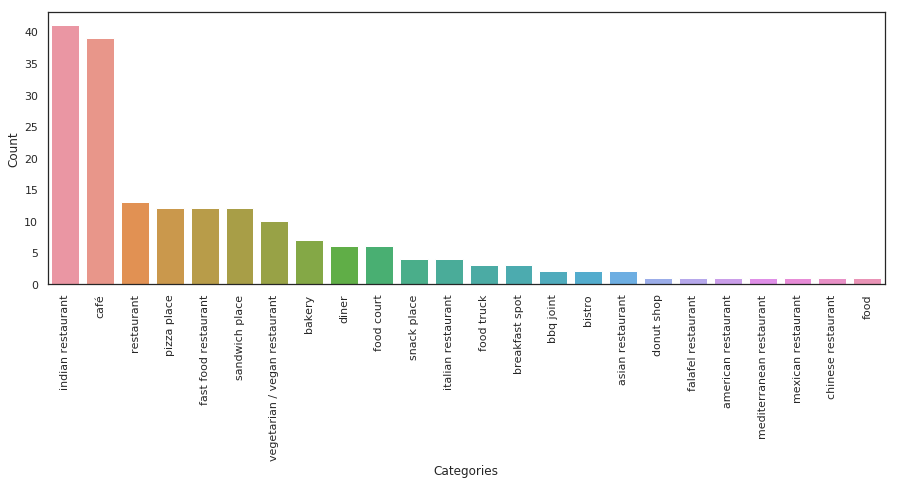

In [55]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="white")

cluster_0 = abad_venues.loc[abad_venues['Cluster Labels'] == 0]
clust_cat_plot = sns.barplot(x=cluster_0['Venue Category'].value_counts().index, y=cluster_0['Venue Category'].value_counts(), data=cluster_0)
clust_cat_plot.set(xlabel='Categories', ylabel='Count')
for item in clust_cat_plot.get_xticklabels():
    item.set_rotation(90)
clust_cat_plot

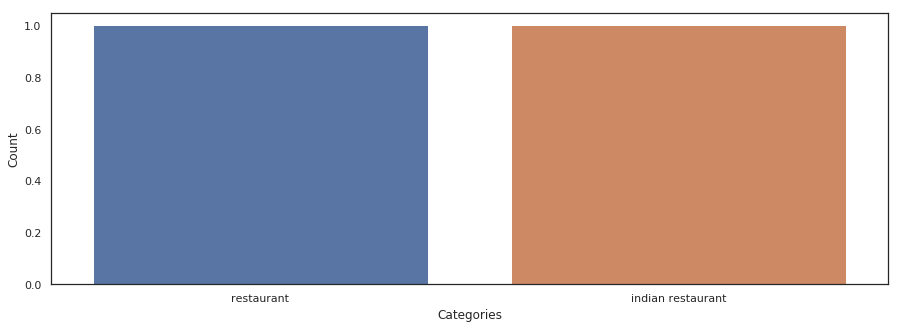

In [35]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="white")
cluster_1 = abad_venues.loc[abad_venues['Cluster Labels'] == 1]

clust1_cat_plot = sns.barplot(x=cluster_1['Venue Category'].value_counts().index, y=cluster_1['Venue Category'].value_counts(), data=cluster_1)
clust1_cat_plot.set(xlabel='Categories', ylabel='Count')
clust1_cat_plot

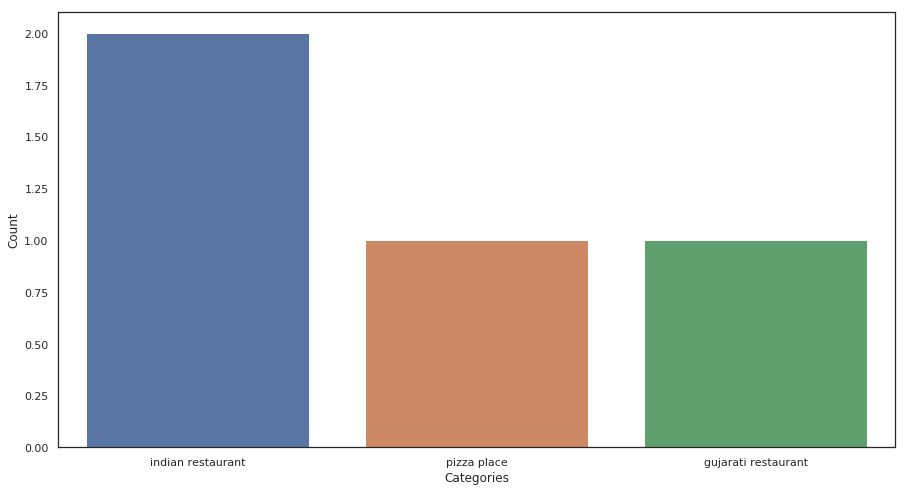

In [37]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="white")
cluster_2 = abad_venues.loc[abad_venues['Cluster Labels'] == 2]

clust2_cat_plot = sns.barplot(x=cluster_2['Venue Category'].value_counts().index, y=cluster_2['Venue Category'].value_counts(), data=cluster_2)
clust2_cat_plot.set(xlabel='Categories', ylabel='Count')
clust2_cat_plot